#Rough Set

In [ ]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("winered.csv",sep=';')
df

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,7.8,0.610,0.29,1.6,0.114,9,29,0.99740,3.26,1.56,9.1,5
1,7.9,0.320,0.51,1.8,0.341,17,56,0.99690,3.04,1.08,9.2,6
2,8.9,0.220,0.48,1.8,0.077,29,60,0.99680,3.39,0.53,9.4,6
3,7.6,0.390,0.31,2.3,0.082,23,71,0.99820,3.52,0.65,9.7,5
4,7.9,0.430,0.21,1.6,0.106,10,37,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
630,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
631,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
632,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
633,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6


In [ ]:
df=df.iloc[::,1:]         
#df1=df.iloc[::,:-1] #memisahkan antara variabel x dan y
df

,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,0.610,0.29,1.6,0.114,9,29,0.99740,3.26,1.56,9.1,5
1,0.320,0.51,1.8,0.341,17,56,0.99690,3.04,1.08,9.2,6
2,0.220,0.48,1.8,0.077,29,60,0.99680,3.39,0.53,9.4,6
3,0.390,0.31,2.3,0.082,23,71,0.99820,3.52,0.65,9.7,5
4,0.430,0.21,1.6,0.106,10,37,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...
630,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
631,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
632,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
633,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6


In [ ]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['quality'].value_counts()

In [ ]:
#Encoding dengan data sedikit
#cleanup_nums = {"quality":     {"good": 1, "bad": 2}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [ ]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [ ]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['quality']=faktor.iloc[::,-1]
    return df_CR

In [ ]:
df_CR=Core_and_Reduct(df)
df_CR

,VA,CA,RS,quality
0,0.610,0.29,1.6,5
1,0.320,0.51,1.8,6
2,0.220,0.48,1.8,6
3,0.390,0.31,2.3,5
4,0.430,0.21,1.6,5
...,...,...,...,...
630,0.620,0.08,1.9,6
631,0.600,0.08,2.0,5
632,0.550,0.10,2.2,6
633,0.510,0.13,2.3,6


In [ ]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [ ]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

,Unnamed: 0,VA,CA,RS,quality
0,0,0.610,0.29,1.6,5
1,1,0.320,0.51,1.8,6
2,2,0.220,0.48,1.8,6
3,3,0.390,0.31,2.3,5
4,4,0.430,0.21,1.6,5
...,...,...,...,...,...
630,630,0.620,0.08,1.9,6
631,631,0.600,0.08,2.0,5
632,632,0.550,0.10,2.2,6
633,633,0.510,0.13,2.3,6


In [ ]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

,VA,CA,RS,quality
0,0.610,0.29,1.6,5
1,0.320,0.51,1.8,6
2,0.220,0.48,1.8,6
3,0.390,0.31,2.3,5
4,0.430,0.21,1.6,5
...,...,...,...,...
630,0.620,0.08,1.9,6
631,0.600,0.08,2.0,5
632,0.550,0.10,2.2,6
633,0.510,0.13,2.3,6


In [ ]:
df_tsk.describe()

,VA,CA,RS,quality
count,635.000000,635.000000,635.000000,635.000000
mean,0.508157,0.286583,2.377323,5.735433
std,0.174732,0.176104,0.908784,0.826944
min,0.120000,0.010000,1.200000,3.000000
25%,0.380000,0.130000,1.900000,5.000000
50%,0.500000,0.280000,2.200000,6.000000
75%,0.620000,0.430000,2.500000,6.000000
max,1.180000,0.750000,8.900000,8.000000


In [ ]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

VA         0
CA         0
RS         0
quality    0
dtype: int64

In [ ]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   VA       635 non-null    float64
 1   CA       635 non-null    float64
 2   RS       635 non-null    float64
 3   quality  635 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 20.0 KB


#Info Atribute
1. fixed acidity/keasaman tetap
2. volatile acidity/keasaman yang mudah menguap= (cepat, lambat)
3. citric acid/asam sitrat=(tinggi, rendah) 
4. residual sugar/sisa gula=(banyak, sedikit)
5. chlorides/klorida=(lebih, kurang)
6. free sulfur dioxide/bebas sulfur dioksida
7. total sulfur dioxide/total sulfur dioksida=(terpenuhi, cukup)
8. density/kepadatan
9. pH
10. sulphates/sulfat
11. alcohol/alkohol
12. quality ('good' and 'bad' based on score >5 and <5)/kualitas ('baik' dan 'buruk' berdasarkan skor >5 dan <5)


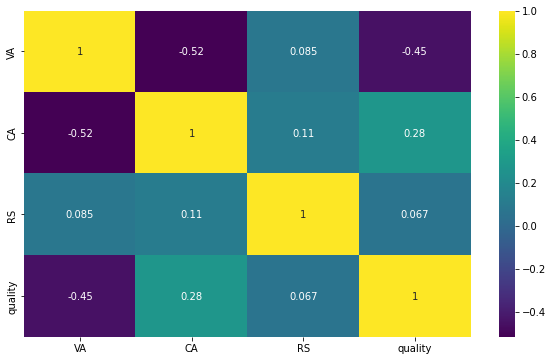

In [ ]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

##Fuzzy A

In [ ]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [ ]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

##Fuzzy B

In [ ]:
def fungsi_segitiga1(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu1 = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu1[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu1[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu1[idx] = 1
    
    return miu1

In [ ]:
def miu_fungsi_segitiga1(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu1 = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu1[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu1[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu1[idx] = 1

    dict_fuzzy1=res = {round(array_x[i],2): miu1[i] for i in range(len(array_x))}
    print(dict_fuzzy1)
    hasil1 = dict_fuzzy1[x_i]

    return hasil1

##Pembentukan Himpunan Fuzzy

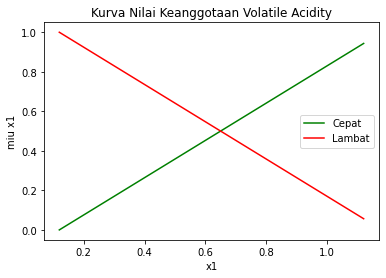

In [ ]:
# Pembentukan Himpunan Fuzzy Volatile Acidity [fungsi buat sendiri]
x_VA= np.arange(0.12, 1.18, 0.1) # Semesta Pembicaraan
amb_cepat = [0.12, 1.18, 1.18]
amb_lambat = [0.12, 0.12, 1.18]

miu_VA_cepat = fungsi_segitiga(x_VA, amb_cepat)
miu_VA_lambat = fungsi_segitiga(x_VA, amb_lambat)

import matplotlib.pyplot as plt
plt.plot(x_VA, miu_VA_cepat, label = "Cepat", color='green')
plt.plot(x_VA, miu_VA_lambat, label = "Lambat", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Volatile Acidity')
plt.legend()
plt.show()

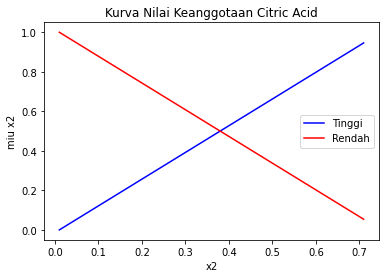

In [ ]:
# Pembentukan Himpunan Fuzzy Citric Acid [fungsi buat sendiri]
x_CA= np.arange(0.01, 0.75, 0.1) # Semesta Pembicaraan
amb_tinggi  = [0.01, 0.75, 0.75]
amb_rendah = [0.01, 0.01, 0.75]

miu_CA_tinggi  = fungsi_segitiga(x_CA, amb_tinggi)
miu_CA_rendah = fungsi_segitiga(x_CA, amb_rendah)

import matplotlib.pyplot as plt
plt.plot(x_CA, miu_CA_tinggi,  label = "Tinggi",  color='blue')
plt.plot(x_CA, miu_CA_rendah, label = "Rendah", color='red')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Citric Acid')
plt.legend()
plt.show()

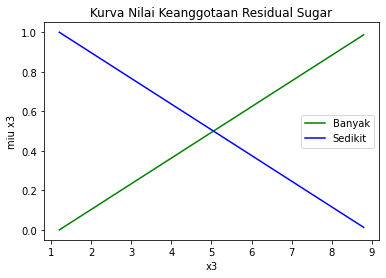

In [ ]:
# Pembentukan Himpunan Fuzzy Residual Sugar [fungsi buat sendiri]
x_RS= np.arange(1.2, 8.9, 0.1) # Semesta Pembicaraan
amb_banyak  = [1.2, 8.9, 8.9]
amb_sedikit  = [1.2, 1.2, 8.9]

miu_RS_banyak  = fungsi_segitiga(x_RS, amb_banyak)
miu_RS_sedikit  = fungsi_segitiga(x_RS, amb_sedikit)

import matplotlib.pyplot as plt
plt.plot(x_RS, miu_RS_banyak,  label = "Banyak",  color='green')
plt.plot(x_RS, miu_RS_sedikit, label = "Sedikit", color='blue')
plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Residual Sugar')
plt.legend()
plt.show()

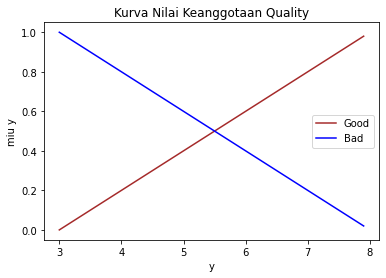

In [ ]:
# Pembentukan Himpunan Fuzzy Quality [fungsi buat sendiri]
x_quality= np.arange(3, 8, 0.1) # Semesta Pembicaraan
amb_good  = [3, 8, 8]
amb_bad  = [3, 3, 8]

miu_quality_good  = fungsi_segitiga(x_quality, amb_good)
miu_quality_bad   = fungsi_segitiga(x_quality, amb_bad)

import matplotlib.pyplot as plt
plt.plot(x_quality, miu_quality_good,  label = "Good",  color='brown')
plt.plot(x_quality, miu_quality_bad, label = "Bad", color='blue')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Quality')
plt.legend()
plt.show()

In [ ]:
def fuzzyfikasi(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil=0
    if x < batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [ ]:
def fuzzyfikasi1(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil1=0
    if x < batas:
        hasil1=miu_fungsi_segitiga1(x_array, amd_1, x)
        label_hasil1 = label_1
    else:
        hasil1=miu_fungsi_segitiga1(x_array, amd_2, x)
        label_hasil1 = label_2
    return hasil1, label_hasil1

In [ ]:
x_VA= np.arange(0, 1.18, 0.1)
amb_cepat = [0.12, 1.18, 1.18]
amb_lambat = [0.12, 0.12, 1.18]

fuzzifikasi_VA=[]
miu_VA=[]
for i in df.VA:
    hasil=fuzzyfikasi(x_VA, amb_cepat, amb_lambat, i, "Cepat", "Lambat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_VA.append(fuzz)
    miu_VA.append(m)
    
len(fuzzifikasi_VA)

0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.9245283018867924, 0.3: 0.8301886792452828, 0.4: 0.7358490566037734, 0.5: 0.641509433962264, 0.6: 0.5471698113207546, 0.7: 0.4528301886792451, 0.8: 0.3584905660377357, 0.9: 0.2641509433962263, 1.0: 0.16981132075471692, 1.1: 0.0754716981132074}
0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.07547169811320756, 0.3: 0.16981132075471703, 0.4: 0.2641509433962264, 0.5: 0.3584905660377358, 0.6: 0.45283018867924535, 0.7: 0.5471698113207547, 0.8: 0.6415094339622641, 0.9: 0.7358490566037735, 1.0: 0.830188679245283, 1.1: 0.9245283018867925}
0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.07547169811320756, 0.3: 0.16981132075471703, 0.4: 0.2641509433962264, 0.5: 0.3584905660377358, 0.6: 0.45283018867924535, 0.7: 0.5471698113207547, 0.8: 0.6415094339622641, 0.9: 0.7358490566037735, 1.0: 0.830188679245283, 1.1: 0.9245283018867925}
0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.07547169811320756, 0.3: 0.16981132075471703, 0.4: 0.2641509433962264, 0.5: 0.3584905660377358, 0.6: 0.45283018867924535, 0.7: 0.5471698

635

In [ ]:
x_CA= np.arange(0, 0.75, 0.1) 
amb_tinggi  = [0.01, 0.75, 0.75]
amb_rendah = [0.01, 0.01, 0.75]

fuzzifikasi_CA=[]
miu_CA=[]
for i in df.CA:
    hasil=fuzzyfikasi(x_CA, amb_tinggi, amb_rendah, i, "Tinggi", "Rendah")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_CA.append(fuzz)
    miu_CA.append(m)

len(fuzzifikasi_CA)

0.35000000000000003
{0.0: 0.0, 0.1: 0.12162162162162164, 0.2: 0.25675675675675674, 0.3: 0.39189189189189194, 0.4: 0.5270270270270271, 0.5: 0.6621621621621622, 0.6: 0.7972972972972974, 0.7: 0.9324324324324326}
0.35000000000000003
{0.0: 0.0, 0.1: 0.8783783783783784, 0.2: 0.7432432432432433, 0.3: 0.608108108108108, 0.4: 0.47297297297297297, 0.5: 0.33783783783783783, 0.6: 0.20270270270270258, 0.7: 0.06756756756756747}
0.35000000000000003
{0.0: 0.0, 0.1: 0.8783783783783784, 0.2: 0.7432432432432433, 0.3: 0.608108108108108, 0.4: 0.47297297297297297, 0.5: 0.33783783783783783, 0.6: 0.20270270270270258, 0.7: 0.06756756756756747}
0.35000000000000003
{0.0: 0.0, 0.1: 0.12162162162162164, 0.2: 0.25675675675675674, 0.3: 0.39189189189189194, 0.4: 0.5270270270270271, 0.5: 0.6621621621621622, 0.6: 0.7972972972972974, 0.7: 0.9324324324324326}
0.35000000000000003
{0.0: 0.0, 0.1: 0.12162162162162164, 0.2: 0.25675675675675674, 0.3: 0.39189189189189194, 0.4: 0.5270270270270271, 0.5: 0.6621621621621622, 0.6: 

635

In [ ]:
x_RS= np.arange(1, 8.9, 0.1)
amb_banyak  = [1.2, 8.9, 8.9]
amb_sedikit  = [1.2, 1.2, 8.9]

fuzzifikasi_RS=[]
miu_RS=[]
for i in df.RS:
    hasil=fuzzyfikasi(x_RS, amb_banyak, amb_sedikit, i, "Banyak", "Sedikit")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_RS.append(fuzz)
    miu_RS.append(m)
len(fuzzifikasi_RS)

4.900000000000004
{1.0: 0.0, 1.1: 0.0, 1.2: 2.883696167857549e-17, 1.3: 0.012987012987013028, 1.4: 0.025974025974026024, 1.5: 0.03896103896103902, 1.6: 0.05194805194805202, 1.7: 0.06493506493506503, 1.8: 0.07792207792207802, 1.9: 0.09090909090909102, 2.0: 0.10389610389610401, 2.1: 0.11688311688311702, 2.2: 0.12987012987013002, 2.3: 0.14285714285714302, 2.4: 0.155844155844156, 2.5: 0.168831168831169, 2.6: 0.18181818181818202, 2.7: 0.194805194805195, 2.8: 0.207792207792208, 2.9: 0.220779220779221, 3.0: 0.233766233766234, 3.1: 0.246753246753247, 3.2: 0.25974025974025994, 3.3: 0.27272727272727304, 3.4: 0.285714285714286, 3.5: 0.298701298701299, 3.6: 0.31168831168831196, 3.7: 0.324675324675325, 3.8: 0.33766233766233794, 3.9: 0.350649350649351, 4.0: 0.3636363636363639, 4.1: 0.376623376623377, 4.2: 0.38961038961038996, 4.3: 0.4025974025974029, 4.4: 0.41558441558441594, 4.5: 0.428571428571429, 4.6: 0.4415584415584419, 4.7: 0.45454545454545486, 4.8: 0.4675324675324679, 4.9: 0.480519480519481, 5

635

In [ ]:
x_quality= np.arange(3, 9, 0.1) # Semesta Pembicaraan
amb_good  = [3, 8, 8]
amb_bad  = [3, 3, 8]

fuzzifikasi_quality=[]
miu_quality=[]
for i in df.quality:
    hasil=fuzzyfikasi(x_quality, amb_good, amb_bad, i, "Good", "Bad")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_quality.append(fuzz)
    miu_quality.append(m)
len(fuzzifikasi_quality)

5.950000000000003
{3.0: 0.0, 3.1: 0.020000000000000018, 3.2: 0.040000000000000036, 3.3: 0.06000000000000005, 3.4: 0.08000000000000007, 3.5: 0.10000000000000009, 3.6: 0.1200000000000001, 3.7: 0.14000000000000012, 3.8: 0.16000000000000014, 3.9: 0.18000000000000016, 4.0: 0.20000000000000018, 4.1: 0.22000000000000028, 4.2: 0.2400000000000002, 4.3: 0.2600000000000001, 4.4: 0.28000000000000025, 4.5: 0.3000000000000004, 4.6: 0.3200000000000003, 4.7: 0.3400000000000002, 4.8: 0.3600000000000003, 4.9: 0.38000000000000045, 5.0: 0.40000000000000036, 5.1: 0.42000000000000026, 5.2: 0.4400000000000004, 5.3: 0.4600000000000005, 5.4: 0.4800000000000004, 5.5: 0.5000000000000003, 5.6: 0.5200000000000005, 5.7: 0.5400000000000006, 5.8: 0.5600000000000005, 5.9: 0.5800000000000004, 6.0: 0.6000000000000005, 6.1: 0.6200000000000007, 6.2: 0.6400000000000006, 6.3: 0.6600000000000005, 6.4: 0.6800000000000006, 6.5: 0.7000000000000007, 6.6: 0.7200000000000006, 6.7: 0.7400000000000005, 6.8: 0.7600000000000007, 6.9: 

635

In [ ]:
df_fuzz = pd.DataFrame({"VA":df.VA,
                        "CA":df.CA,
                        "RS":df.RS,
                        "quality":df.quality,
                        "VA_fuzz": fuzzifikasi_VA,
                        "CA_fuzz": fuzzifikasi_CA,
                        "RS_fuzz": fuzzifikasi_RS,
                        "quality_fuzz":fuzzifikasi_quality,
                        "miu_VA":miu_VA,
                        "miu_CA":miu_CA,
                        "miu_RS":miu_RS,
                        "miu_quality": miu_quality})
df_fuzz

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality
0,0.610,0.29,1.6,5,Lambat,Tinggi,Banyak,Good,0.0,0.0,0.000000,0.4
1,0.320,0.51,1.8,6,Cepat,Rendah,Banyak,Bad,0.0,0.0,0.000000,0.4
2,0.220,0.48,1.8,6,Cepat,Rendah,Banyak,Bad,0.0,0.0,0.000000,0.4
3,0.390,0.31,2.3,5,Cepat,Tinggi,Banyak,Good,0.0,0.0,0.103896,0.4
4,0.430,0.21,1.6,5,Cepat,Tinggi,Banyak,Good,0.0,0.0,0.000000,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
630,0.620,0.08,1.9,6,Lambat,Tinggi,Banyak,Bad,0.0,0.0,0.000000,0.4
631,0.600,0.08,2.0,5,Lambat,Tinggi,Banyak,Good,0.0,0.0,0.103896,0.4
632,0.550,0.10,2.2,6,Lambat,Tinggi,Banyak,Bad,0.0,0.0,0.103896,0.4
633,0.510,0.13,2.3,6,Cepat,Tinggi,Banyak,Bad,0.0,0.0,0.103896,0.4


# Rule Generation

In [ ]:
df_fuzz['Rule'] = " Jika X1 " + df_fuzz['VA_fuzz'] + " dan X2 " + df_fuzz['CA_fuzz'] + " dan X3 " + df_fuzz['RS_fuzz'] + " maka Y " + df_fuzz['quality_fuzz']
df_fuzz

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.610,0.29,1.6,5,Lambat,Tinggi,Banyak,Good,0.0,0.0,0.000000,0.4,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak ma...
1,0.320,0.51,1.8,6,Cepat,Rendah,Banyak,Bad,0.0,0.0,0.000000,0.4,Jika X1 Cepat dan X2 Rendah dan X3 Banyak mak...
2,0.220,0.48,1.8,6,Cepat,Rendah,Banyak,Bad,0.0,0.0,0.000000,0.4,Jika X1 Cepat dan X2 Rendah dan X3 Banyak mak...
3,0.390,0.31,2.3,5,Cepat,Tinggi,Banyak,Good,0.0,0.0,0.103896,0.4,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak mak...
4,0.430,0.21,1.6,5,Cepat,Tinggi,Banyak,Good,0.0,0.0,0.000000,0.4,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak mak...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,0.620,0.08,1.9,6,Lambat,Tinggi,Banyak,Bad,0.0,0.0,0.000000,0.4,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak ma...
631,0.600,0.08,2.0,5,Lambat,Tinggi,Banyak,Good,0.0,0.0,0.103896,0.4,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak ma...
632,0.550,0.10,2.2,6,Lambat,Tinggi,Banyak,Bad,0.0,0.0,0.103896,0.4,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak ma...
633,0.510,0.13,2.3,6,Cepat,Tinggi,Banyak,Bad,0.0,0.0,0.103896,0.4,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak mak...


In [ ]:
df_fuzz.to_excel('hasilRule.xlsx') 

In [ ]:
df_fuzz['Rule'].value_counts()

 Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka Y Bad       151
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak maka Y Good     137
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka Y Bad       120
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak maka Y Bad       78
 Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka Y Good       54
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka Y Good       49
 Jika X1 Lambat dan X2 Rendah dan X3 Banyak maka Y Good      17
 Jika X1 Lambat dan X2 Rendah dan X3 Banyak maka Y Bad        8
 Jika X1 Cepat dan X2 Rendah dan X3 Sedikit maka Y Bad        7
 Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit maka Y Bad       5
 Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit maka Y Good      4
 Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit maka Y Bad        3
 Jika X1 Cepat dan X2 Rendah dan X3 Sedikit maka Y Good       1
 Jika X1 Lambat dan X2 Rendah dan X3 Sedikit maka Y Bad       1
Name: Rule, dtype: int64

# TSK Prediction

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [ ]:
rule_1 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka Y Bad"]
index=rule_1.index
data_rule_1=df_fuzz.iloc[index,:4]
X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule1=pd.read_csv('rule1.csv',sep=',')
df_rule1

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.32,0.51,1.8,6,Cepat,Rendah,Banyak,Bad,0.811321,0.675676,0.922078,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
1,0.22,0.48,1.8,6,Cepat,Rendah,Banyak,Bad,0.905660,0.635135,0.922078,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
2,0.30,0.48,1.8,6,Cepat,Rendah,Banyak,Bad,0.830189,0.635135,0.922078,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
3,0.39,0.40,2.6,6,Cepat,Rendah,Banyak,Bad,0.745283,0.527027,0.818182,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
4,0.41,0.50,2.5,7,Cepat,Rendah,Banyak,Bad,0.726415,0.662162,0.831169,0.8,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.26,0.37,1.4,6,Cepat,Rendah,Banyak,Bad,0.867925,0.486486,0.974026,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
147,0.23,0.37,1.8,6,Cepat,Rendah,Banyak,Bad,0.896226,0.486486,0.922078,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
148,0.32,0.44,2.7,7,Cepat,Rendah,Banyak,Bad,0.811321,0.581081,0.805195,0.8,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
149,0.45,0.63,2.2,6,Cepat,Rendah,Banyak,Bad,0.688679,0.837838,0.870130,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...


In [ ]:
#df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
#df_rule1

In [ ]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('quality',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['quality'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[0.48780488, 0.38461538, 0.17647059],
       [0.24390244, 0.30769231, 0.17647059],
       [0.43902439, 0.30769231, 0.17647059],
       [0.65853659, 0.1025641 , 0.41176471],
       [0.70731707, 0.35897436, 0.38235294],
       [0.68292683, 0.38461538, 0.41176471],
       [0.56097561, 0.43589744, 0.41176471],
       [0.56097561, 0.43589744, 0.41176471],
       [0.34146341, 0.28205128, 0.20588235],
       [0.29268293, 0.15384615, 0.17647059],
       [0.90243902, 0.69230769, 0.5       ],
       [0.29268293, 0.25641026, 0.17647059],
       [0.41463415, 1.        , 0.47058824],
       [0.68292683, 0.30769231, 0.26470588],
       [0.95121951, 0.71794872, 0.35294118],
       [0.95121951, 0.71794872, 0.35294118],
       [0.2195122 , 0.33333333, 0.47058824],
       [0.63414634, 0.33333333, 0.38235294],
       [0.73170732, 0.33333333, 0.41176471],
       [0.46341463, 0.97435897, 0.17647059],
       [0.46341463, 0.33333333, 0.38235294],
       [0.56097561, 0.33333333, 0.41176471],
       [1.

In [ ]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5,
       0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0.5, 0.5,
       0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0.5,
       0.5, 0.5, 0. , 0. , 0.5, 0.5, 0.5, 0.5, 1. , 0. , 0. , 0.5, 0.5,
       0.5, 0. , 0.5, 0.5, 1. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0.5,
       0.5, 0. , 0.5, 1. , 0.5, 0.5, 0.5, 0. , 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ])

In [ ]:
def mini_batch_gradient_descent_rule1(X1, y1, iterasi, batch_size = 4, learning_rate = 0.1):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule1 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = X1[random_indices]
        y1_smntr = y1[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule1 = X1_smntr[j:j+batch_size]
            yj_rule1 = y1_smntr[j:j+batch_size]
            
            y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule1_grad = -(2/len(Xj_rule1))*(Xj_rule1.T.dot(yj_rule1-y1_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule1_grad = -(2/len(Xj_rule1))*np.sum(yj_rule1-y1_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad        # Memperbaharui bpoly(bobot) setiap iterasi
            b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                 # Memperbaharui bpoly(bobot) setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule1 in range(jumlah_variabel_rule1):
                bp_rule1=bpoly_rule1[jv_rule1]
                bp.append(bp_rule1)
            b_rule1=[b0_rule1]+bp
        
            cost_rule1 = np.mean(np.square(yj_rule1-y1_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [ ]:
import time
mulai_rule1 = time.time()
mb_bpoly_rule1, mb_b0_rule1, mb_cost_rule1, mb_b_rule1_list, mb_cost_rule1_list, mb_iterasi_rule1_list=mini_batch_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                        scaled_y1_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  14.753503561019897


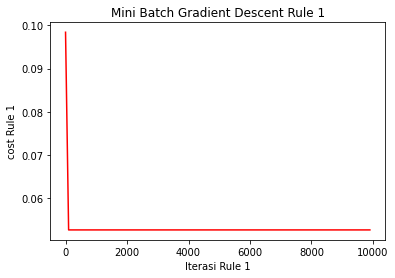

In [ ]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Mini Batch Gradient Descent Rule 1")
plt.plot(mb_iterasi_rule1_list,mb_cost_rule1_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule1

0.052652888251540915

In [ ]:
mb_b0_rule1

0.3387736708782141

In [ ]:
mb_bpoly_rule1 #hasil untuk x1 dan x2

array([-0.18149805,  0.17690848,  0.1362077 ])

In [ ]:
data_rule_1

,VA,CA,RS,quality
1,0.32,0.51,1.8,6
2,0.22,0.48,1.8,6
42,0.30,0.48,1.8,6
48,0.39,0.40,2.6,6
50,0.41,0.50,2.5,7
...,...,...,...,...
593,0.26,0.37,1.4,6
594,0.23,0.37,1.8,6
607,0.32,0.44,2.7,7
610,0.45,0.63,2.2,6


In [ ]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

array([[0.32 , 0.51 , 1.8  ],
       [0.22 , 0.48 , 1.8  ],
       [0.3  , 0.48 , 1.8  ],
       [0.39 , 0.4  , 2.6  ],
       [0.41 , 0.5  , 2.5  ],
       [0.4  , 0.51 , 2.6  ],
       [0.35 , 0.53 , 2.6  ],
       [0.35 , 0.53 , 2.6  ],
       [0.26 , 0.47 , 1.9  ],
       [0.24 , 0.42 , 1.8  ],
       [0.49 , 0.63 , 2.9  ],
       [0.24 , 0.46 , 1.8  ],
       [0.29 , 0.75 , 2.8  ],
       [0.4  , 0.48 , 2.1  ],
       [0.51 , 0.64 , 2.4  ],
       [0.51 , 0.64 , 2.4  ],
       [0.21 , 0.49 , 2.8  ],
       [0.38 , 0.49 , 2.5  ],
       [0.42 , 0.49 , 2.6  ],
       [0.31 , 0.74 , 1.8  ],
       [0.31 , 0.49 , 2.5  ],
       [0.35 , 0.49 , 2.6  ],
       [0.53 , 0.49 , 1.9  ],
       [0.53 , 0.49 , 4.6  ],
       [0.53 , 0.49 , 4.6  ],
       [0.47 , 0.49 , 4.3  ],
       [0.47 , 0.49 , 4.3  ],
       [0.5  , 0.49 , 2.6  ],
       [0.35 , 0.49 , 3.3  ],
       [0.34 , 0.49 , 3.2  ],
       [0.27 , 0.49 , 3.1  ],
       [0.31 , 0.49 , 2.2  ],
       [0.28 , 0.49 , 1.9  ],
       [0.

In [ ]:
Y1=np.array(data_rule_1.iloc[:,3])  #mengambil angka dari kolom
Y1

array([6, 6, 6, 6, 7, 7, 8, 8, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 7, 6, 6, 6, 7, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6,
       7, 6, 7, 7, 7, 6, 6, 7, 7, 7, 7, 8, 6, 6, 7, 7, 7, 6, 7, 7, 8, 6,
       7, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 7, 7, 6,
       7, 8, 7, 7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

,VA,CA,RS,quality,pred
1,0.32,0.51,1.8,6,6.482830
2,0.22,0.48,1.8,6,6.550049
42,0.30,0.48,1.8,6,6.488121
48,0.39,0.40,2.6,6,6.446237
50,0.41,0.50,2.5,7,6.525207
...,...,...,...,...,...
593,0.26,0.37,1.4,6,6.404711
594,0.23,0.37,1.8,6,6.568758
607,0.32,0.44,2.7,7,6.601829
610,0.45,0.63,2.2,6,6.624164


##Rule 2


In [ ]:
rule_2 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak maka Y Good"]
index=rule_2.index
data_rule_2=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule2=pd.read_csv('rule2.csv',sep=',')
df_rule2

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.610,0.29,1.6,5,Lambat,Tinggi,Banyak,Good,0.462264,0.621622,0.948052,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
1,0.660,0.22,2.2,5,Lambat,Tinggi,Banyak,Good,0.509434,0.716216,0.870130,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
2,0.670,0.02,1.8,5,Lambat,Tinggi,Banyak,Good,0.518868,0.986486,0.922078,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
3,0.660,0.26,1.7,5,Lambat,Tinggi,Banyak,Good,0.509434,0.662162,0.935065,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
4,0.620,0.04,3.8,5,Lambat,Tinggi,Banyak,Good,0.471698,0.959459,0.662338,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.980,0.05,2.1,3,Lambat,Tinggi,Banyak,Good,0.811321,0.945946,0.883117,1.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
133,0.690,0.11,1.4,5,Lambat,Tinggi,Banyak,Good,0.537736,0.864865,0.974026,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
134,0.600,0.08,1.8,5,Lambat,Tinggi,Banyak,Good,0.452830,0.905405,0.922078,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
135,0.600,0.08,2.0,5,Lambat,Tinggi,Banyak,Good,0.452830,0.905405,0.896104,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...


In [ ]:
#df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
#df_rule2

In [ ]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('quality',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['quality'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.0952381 , 0.82352941, 0.08571429],
       [0.17460317, 0.61764706, 0.25714286],
       [0.19047619, 0.02941176, 0.14285714],
       [0.17460317, 0.73529412, 0.11428571],
       [0.11111111, 0.08823529, 0.71428571],
       [0.29365079, 0.11764706, 0.2       ],
       [0.27777778, 0.11764706, 0.95714286],
       [0.27777778, 0.11764706, 0.95714286],
       [0.24603175, 0.17647059, 0.08571429],
       [0.1984127 , 0.73529412, 0.22857143],
       [0.31746032, 0.32352941, 0.2       ],
       [0.19047619, 0.73529412, 0.14285714],
       [0.        , 0.41176471, 0.25714286],
       [0.55555556, 0.14705882, 0.34285714],
       [0.12698413, 0.67647059, 0.31428571],
       [0.12698413, 0.67647059, 0.31428571],
       [0.06349206, 0.67647059, 0.57142857],
       [0.26190476, 0.67647059, 0.22857143],
       [0.77777778, 0.67647059, 0.08571429],
       [0.26984127, 0.47058824, 0.37142857],
       [0.57936508, 0.76470588, 0.22857143],
       [0.07936508, 0.82352941, 0.25714286],
       [0.

In [ ]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 0.5,
       1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
       1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. ,
       1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0.5, 0. , 1. , 1. , 1. , 1. ])

In [ ]:
def mini_batch_gradient_descent_rule2(X2, y2, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule2 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X2_smntr = X2[random_indices]
        y2_smntr = y2[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule2 = X2_smntr[j:j+batch_size]
            yj_rule2 = y2_smntr[j:j+batch_size]
            
            y2_pred = np.dot(bpoly_rule2, Xj_rule2.T) + b0_rule2           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule2_grad = -(2/len(Xj_rule2))*(Xj_rule2.T.dot(yj_rule2-y2_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule2_grad = -(2/len(Xj_rule2))*np.sum(yj_rule2-y2_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule2 in range(jumlah_variabel_rule2):
                bp_rule2=bpoly_rule2[jv_rule2]
                bp.append(bp_rule2)
            b_rule2=[b0_rule2]+bp
        
            cost_rule2 = np.mean(np.square(yj_rule2-y2_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [ ]:
import time
mulai_rule2 = time.time()
mb_bpoly_rule2, mb_b0_rule2, mb_cost_rule2, mb_b_rule2_list, mb_cost_rule2_list, mb_iterasi_rule2_list=mini_batch_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 10, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  6.9733967781066895


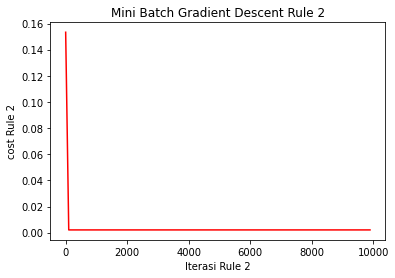

In [ ]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(mb_iterasi_rule2_list,mb_cost_rule2_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule2

0.020335999918643582

In [ ]:
mb_b0_rule2

1.0363562250959824

In [ ]:
mb_bpoly_rule2 #hasil untuk x1 dan x2

array([-0.39275101,  0.07303826, -0.0676326 ])

In [ ]:
data_rule_2

,VA,CA,RS,quality
0,0.610,0.29,1.6,5
13,0.660,0.22,2.2,5
14,0.670,0.02,1.8,5
19,0.660,0.26,1.7,5
23,0.620,0.04,3.8,5
...,...,...,...,...
623,0.980,0.05,2.1,3
624,0.690,0.11,1.4,5
626,0.600,0.08,1.8,5
631,0.600,0.08,2.0,5


In [ ]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

array([[0.61 , 0.29 , 1.6  ],
       [0.66 , 0.22 , 2.2  ],
       [0.67 , 0.02 , 1.8  ],
       [0.66 , 0.26 , 1.7  ],
       [0.62 , 0.04 , 3.8  ],
       [0.735, 0.05 , 2.   ],
       [0.725, 0.05 , 4.65 ],
       [0.725, 0.05 , 4.65 ],
       [0.705, 0.07 , 1.6  ],
       [0.675, 0.26 , 2.1  ],
       [0.75 , 0.12 , 2.   ],
       [0.67 , 0.26 , 1.8  ],
       [0.55 , 0.15 , 2.2  ],
       [0.9  , 0.06 , 2.5  ],
       [0.63 , 0.24 , 2.4  ],
       [0.63 , 0.24 , 2.4  ],
       [0.59 , 0.24 , 3.3  ],
       [0.715, 0.24 , 2.1  ],
       [1.04 , 0.24 , 1.6  ],
       [0.72 , 0.17 , 2.6  ],
       [0.915, 0.27 , 2.1  ],
       [0.6  , 0.29 , 2.2  ],
       [0.6  , 0.29 , 2.2  ],
       [0.685, 0.23 , 2.3  ],
       [0.67 , 0.05 , 3.6  ],
       [0.845, 0.01 , 2.2  ],
       [0.55 , 0.17 , 2.9  ],
       [0.84 , 0.02 , 4.4  ],
       [0.59 , 0.14 , 2.   ],
       [0.73 , 0.21 , 1.7  ],
       [0.73 , 0.21 , 1.7  ],
       [0.78 , 0.23 , 2.6  ],
       [0.65 , 0.18 , 1.8  ],
       [0.

In [ ]:
Y2=np.array(data_rule_2.iloc[:,3])
Y2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5,
       5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       3, 5, 5, 5, 5])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

,VA,CA,RS,quality,pred
0,0.610,0.29,1.6,5,4.796589
13,0.660,0.22,2.2,5,4.984274
14,0.670,0.02,1.8,5,4.870900
19,0.660,0.26,1.7,5,4.911437
23,0.620,0.04,3.8,5,4.947330
...,...,...,...,...,...
623,0.980,0.05,2.1,3,4.241254
624,0.690,0.11,1.4,5,5.010672
626,0.600,0.08,1.8,5,5.054569
631,0.600,0.08,2.0,5,5.046606


##Rule 3

In [ ]:
rule_3 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka Y Bad"]
index=rule_3.index
data_rule_3=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule3=pd.read_csv('rule3.csv',sep=',')
df_rule3

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.40,0.14,2.4,6,Cepat,Tinggi,Banyak,Bad,0.735849,0.824324,0.844156,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
1,0.38,0.28,2.1,7,Cepat,Tinggi,Banyak,Bad,0.754717,0.635135,0.883117,0.8,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
2,0.52,0.04,2.2,6,Cepat,Tinggi,Banyak,Bad,0.622642,0.959459,0.870130,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
3,0.50,0.04,2.1,6,Cepat,Tinggi,Banyak,Bad,0.641509,0.959459,0.883117,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
4,0.51,0.15,2.8,6,Cepat,Tinggi,Banyak,Bad,0.632075,0.810811,0.792208,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.48,0.32,2.1,7,Cepat,Tinggi,Banyak,Bad,0.660377,0.581081,0.883117,0.8,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
116,0.48,0.32,2.1,7,Cepat,Tinggi,Banyak,Bad,0.660377,0.581081,0.883117,0.8,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
117,0.47,0.11,2.2,7,Cepat,Tinggi,Banyak,Bad,0.669811,0.864865,0.870130,0.8,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
118,0.51,0.13,2.3,6,Cepat,Tinggi,Banyak,Bad,0.632075,0.837838,0.857143,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...


In [ ]:
#df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
#df_rule3

In [ ]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('quality',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['quality'].values.reshape(rule_3.shape[0],1))

scaled_X3

array([[0.57971014, 0.38235294, 0.45454545],
       [0.52173913, 0.79411765, 0.31818182],
       [0.92753623, 0.08823529, 0.36363636],
       [0.86956522, 0.08823529, 0.31818182],
       [0.89855072, 0.41176471, 0.63636364],
       [0.92753623, 0.44117647, 0.22727273],
       [1.        , 0.5       , 0.22727273],
       [0.86956522, 0.85294118, 0.22727273],
       [0.92753623, 0.70588235, 0.22727273],
       [0.92753623, 0.70588235, 0.22727273],
       [0.05797101, 0.67647059, 0.31818182],
       [0.20289855, 0.67647059, 0.31818182],
       [0.8115942 , 0.67647059, 0.59090909],
       [0.05797101, 0.67647059, 0.31818182],
       [0.89855072, 0.        , 0.31818182],
       [0.66666667, 0.67647059, 0.63636364],
       [0.75362319, 0.67647059, 0.59090909],
       [0.46376812, 0.67647059, 0.36363636],
       [0.46376812, 0.67647059, 0.36363636],
       [0.89855072, 0.67647059, 0.45454545],
       [0.46376812, 0.52941176, 0.81818182],
       [0.89855072, 0.70588235, 0.68181818],
       [0.

In [ ]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

array([0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0. ,
       0.5, 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. , 0.5, 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 0.5, 0.5, 0.5, 1. , 0.5, 0. , 0.5, 0. , 0.5, 0.5,
       0.5, 0. , 0. ])

In [ ]:
def mini_batch_gradient_descent_rule3(X3, y3, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule3 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X3_smntr = X3[random_indices]
        y3_smntr = y3[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule3 = X3_smntr[j:j+batch_size]
            yj_rule3 = y3_smntr[j:j+batch_size]
            
            y3_pred = np.dot(bpoly_rule3, Xj_rule3.T) + b0_rule3           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule3_grad = -(2/len(Xj_rule3))*(Xj_rule3.T.dot(yj_rule3-y3_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule3_grad = -(2/len(Xj_rule3))*np.sum(yj_rule3-y3_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule3 in range(jumlah_variabel_rule3):
                bp_rule3=bpoly_rule3[jv_rule3]
                bp.append(bp_rule3)
            b_rule3=[b0_rule3]+bp
        
            cost_rule3 = np.mean(np.square(yj_rule3-y3_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [ ]:
import time
mulai_rule3 = time.time()
mb_bpoly_rule3, mb_b0_rule3, mb_cost_rule3, mb_b_rule3_list, mb_cost_rule3_list, mb_iterasi_rule3_list=mini_batch_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 8, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

Waktu Komputasi Rule 3:  7.338647365570068


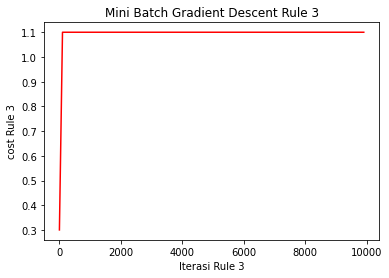

In [ ]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Mini Batch Gradient Descent Rule 3")
plt.plot(mb_iterasi_rule3_list,mb_cost_rule3_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule3

1.1003201741785658

In [ ]:
mb_b0_rule3

0.8003217234966398

In [ ]:
mb_bpoly_rule3 #hasil untuk x1 dan x2

array([-0.22161174,  0.45572836,  0.16933777])

In [ ]:
data_rule_3

,VA,CA,RS,quality
6,0.40,0.14,2.4,6
12,0.38,0.28,2.1,7
20,0.52,0.04,2.2,6
21,0.50,0.04,2.1,6
22,0.51,0.15,2.8,6
...,...,...,...,...
620,0.48,0.32,2.1,7
622,0.48,0.32,2.1,7
627,0.47,0.11,2.2,7
629,0.51,0.13,2.3,6


In [ ]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

array([[0.4  , 0.14 , 2.4  ],
       [0.38 , 0.28 , 2.1  ],
       [0.52 , 0.04 , 2.2  ],
       [0.5  , 0.04 , 2.1  ],
       [0.51 , 0.15 , 2.8  ],
       [0.52 , 0.16 , 1.9  ],
       [0.545, 0.18 , 1.9  ],
       [0.5  , 0.3  , 1.9  ],
       [0.52 , 0.25 , 1.9  ],
       [0.52 , 0.25 , 1.9  ],
       [0.22 , 0.24 , 2.1  ],
       [0.27 , 0.24 , 2.1  ],
       [0.48 , 0.24 , 2.7  ],
       [0.22 , 0.24 , 2.1  ],
       [0.51 , 0.01 , 2.1  ],
       [0.43 , 0.24 , 2.8  ],
       [0.46 , 0.24 , 2.7  ],
       [0.36 , 0.24 , 2.2  ],
       [0.36 , 0.24 , 2.2  ],
       [0.51 , 0.24 , 2.4  ],
       [0.36 , 0.19 , 3.2  ],
       [0.51 , 0.25 , 2.9  ],
       [0.54 , 0.26 , 2.5  ],
       [0.54 , 0.26 , 2.5  ],
       [0.41 , 0.14 , 3.   ],
       [0.29 , 0.35 , 1.9  ],
       [0.48 , 0.3  , 2.8  ],
       [0.52 , 0.07 , 1.4  ],
       [0.52 , 0.07 , 1.4  ],
       [0.45 , 0.23 , 2.2  ],
       [0.545, 0.12 , 2.5  ],
       [0.49 , 0.18 , 2.7  ],
       [0.5  , 0.18 , 2.1  ],
       [0.

In [ ]:
Y3=np.array(data_rule_3.iloc[:,3])
Y3

array([6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6,
       6, 7, 6, 7, 7, 7, 7, 6, 7, 7, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6,
       7, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 7, 7, 7,
       8, 7, 6, 7, 6, 7, 7, 7, 6, 6])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

,VA,CA,RS,quality,pred
6,0.40,0.14,2.4,6,5.987335
12,0.38,0.28,2.1,7,6.359552
20,0.52,0.04,2.2,6,6.274133
21,0.50,0.04,2.1,6,6.246577
22,0.51,0.15,2.8,6,6.101021
...,...,...,...,...,...
620,0.48,0.32,2.1,7,6.355072
622,0.48,0.32,2.1,7,6.355072
627,0.47,0.11,2.2,7,6.069694
629,0.51,0.13,2.3,6,6.059424


##Rule 4

In [ ]:
rule_4 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak maka Y Bad"]
index=rule_4.index
data_rule_4=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule4=pd.read_csv('rule4.csv',sep=',')
df_rule4

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.600,0.14,2.4,6,Lambat,Tinggi,Banyak,Bad,0.452830,0.824324,0.844156,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
1,0.705,0.05,1.9,6,Lambat,Tinggi,Banyak,Bad,0.551887,0.945946,0.909091,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
2,0.630,0.08,1.9,6,Lambat,Tinggi,Banyak,Bad,0.481132,0.905405,0.909091,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
3,0.610,0.30,2.1,6,Lambat,Tinggi,Banyak,Bad,0.462264,0.608108,0.883117,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
4,0.775,0.27,2.8,6,Lambat,Tinggi,Banyak,Bad,0.617925,0.648649,0.792208,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.640,0.03,2.3,6,Lambat,Tinggi,Banyak,Bad,0.490566,0.972973,0.857143,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
74,0.630,0.01,2.4,6,Lambat,Tinggi,Banyak,Bad,0.481132,1.000000,0.844156,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
75,0.740,0.09,1.7,6,Lambat,Tinggi,Banyak,Bad,0.584906,0.891892,0.935065,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...
76,0.620,0.08,1.9,6,Lambat,Tinggi,Banyak,Bad,0.471698,0.905405,0.909091,0.6,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak mak...


In [ ]:
#df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
#df_rule4

In [ ]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('quality',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['quality'].values.reshape(rule_4.shape[0],1))

scaled_X4

array([[0.11627907, 0.40625   , 0.30769231],
       [0.36046512, 0.125     , 0.11538462],
       [0.18604651, 0.21875   , 0.11538462],
       [0.13953488, 0.90625   , 0.19230769],
       [0.52325581, 0.8125    , 0.46153846],
       [0.3255814 , 0.9375    , 0.53846154],
       [0.3255814 , 0.9375    , 0.53846154],
       [0.09302326, 0.9375    , 0.23076923],
       [0.09302326, 0.9375    , 0.23076923],
       [0.63953488, 0.71875   , 0.19230769],
       [0.25581395, 0.71875   , 0.34615385],
       [0.        , 0.71875   , 0.15384615],
       [0.34883721, 0.71875   , 0.34615385],
       [0.34883721, 0.71875   , 0.34615385],
       [0.08139535, 0.53125   , 0.19230769],
       [0.06976744, 0.375     , 0.5       ],
       [0.11627907, 0.375     , 0.38461538],
       [0.84883721, 0.34375   , 0.23076923],
       [0.04651163, 0.15625   , 0.        ],
       [0.23255814, 0.03125   , 0.19230769],
       [0.23255814, 0.03125   , 0.19230769],
       [0.20930233, 0.03125   , 0.19230769],
       [0.

In [ ]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule4(X4, y4, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule4 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X4_smntr = X4[random_indices]
        y4_smntr = y4[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule4 = X4_smntr[j:j+batch_size]
            yj_rule4 = y4_smntr[j:j+batch_size]
            
            y4_pred = np.dot(bpoly_rule4, Xj_rule4.T) + b0_rule4           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule4_grad = -(2/len(Xj_rule4))*(Xj_rule4.T.dot(yj_rule4-y4_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule4_grad = -(2/len(Xj_rule4))*np.sum(yj_rule4-y4_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule4 in range(jumlah_variabel_rule4):
                bp_rule4=bpoly_rule4[jv_rule4]
                bp.append(bp_rule4)
            b_rule4=[b0_rule4]+bp
        
            cost_rule4 = np.mean(np.square(yj_rule4-y4_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [ ]:
import time
mulai_rule4 = time.time()
mb_bpoly_rule4, mb_b0_rule4, mb_cost_rule4, mb_b_rule4_list, mb_cost_rule4_list, mb_iterasi_rule4_list=mini_batch_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                        scaled_y4_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

Waktu Komputasi Rule 4:  8.977303743362427


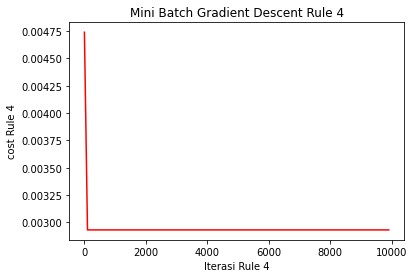

In [ ]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Mini Batch Gradient Descent Rule 4")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule4

0.002930667098132512

In [ ]:
mb_b0_rule4

0.09707036260202914

In [ ]:
mb_bpoly_rule4 #hasil untuk x1 dan x2

array([-0.00668053, -0.15882249, -0.01034984])

In [ ]:
data_rule_4

,VA,CA,RS,quality
11,0.600,0.14,2.4,6
32,0.705,0.05,1.9,6
33,0.630,0.08,1.9,6
46,0.610,0.30,2.1,6
49,0.775,0.27,2.8,6
...,...,...,...,...
616,0.640,0.03,2.3,6
617,0.630,0.01,2.4,6
628,0.740,0.09,1.7,6
630,0.620,0.08,1.9,6


In [ ]:
X4=np.array(data_rule_4.iloc[::,:-1])
X4

array([[0.6  , 0.14 , 2.4  ],
       [0.705, 0.05 , 1.9  ],
       [0.63 , 0.08 , 1.9  ],
       [0.61 , 0.3  , 2.1  ],
       [0.775, 0.27 , 2.8  ],
       [0.69 , 0.31 , 3.   ],
       [0.69 , 0.31 , 3.   ],
       [0.59 , 0.31 , 2.2  ],
       [0.59 , 0.31 , 2.2  ],
       [0.825, 0.24 , 2.1  ],
       [0.66 , 0.24 , 2.5  ],
       [0.55 , 0.24 , 2.   ],
       [0.7  , 0.24 , 2.5  ],
       [0.7  , 0.24 , 2.5  ],
       [0.585, 0.18 , 2.1  ],
       [0.58 , 0.13 , 2.9  ],
       [0.6  , 0.13 , 2.6  ],
       [0.915, 0.12 , 2.2  ],
       [0.57 , 0.06 , 1.6  ],
       [0.65 , 0.02 , 2.1  ],
       [0.65 , 0.02 , 2.1  ],
       [0.64 , 0.02 , 2.1  ],
       [0.72 , 0.09 , 2.8  ],
       [0.865, 0.03 , 3.2  ],
       [0.76 , 0.29 , 4.2  ],
       [0.91 , 0.07 , 1.9  ],
       [0.98 , 0.01 , 2.   ],
       [0.735, 0.02 , 2.5  ],
       [0.56 , 0.22 , 1.8  ],
       [0.56 , 0.22 , 1.8  ],
       [0.63 , 0.03 , 2.   ],
       [0.715, 0.01 , 2.1  ],
       [0.715, 0.01 , 2.1  ],
       [0.

In [ ]:
Y4=np.array(data_rule_4.iloc[:,3])
Y4

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X4_poly = poly_reg.fit_transform(X4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X4_poly, Y4) 
# Proses Training Model
poly_reg.fit(X4, Y4) 

# Memprediksi hasil dengan regresi polynomial
y4_pred=lin_reg_2.predict(poly_reg.fit_transform(X4))
y4_pred

data_rule_4['pred'] = y4_pred
data_rule_4

,VA,CA,RS,quality,pred
11,0.600,0.14,2.4,6,6.148503
32,0.705,0.05,1.9,6,6.055135
33,0.630,0.08,1.9,6,6.126023
46,0.610,0.30,2.1,6,5.920249
49,0.775,0.27,2.8,6,6.150132
...,...,...,...,...,...
616,0.640,0.03,2.3,6,6.109588
617,0.630,0.01,2.4,6,6.100939
628,0.740,0.09,1.7,6,6.019883
630,0.620,0.08,1.9,6,6.138392


##Rule 5

In [ ]:
rule_5 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka Y Good"]
index=rule_5.index
data_rule_5=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule5=pd.read_csv('rule5.csv',sep=',')
df_rule5

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.29,0.52,1.60,5,Cepat,Rendah,Banyak,Good,0.839623,0.689189,0.948052,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
1,0.31,0.37,1.40,5,Cepat,Rendah,Banyak,Good,0.820755,0.486486,0.974026,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
2,0.42,0.57,3.40,5,Cepat,Rendah,Banyak,Good,0.716981,0.756757,0.714286,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
3,0.32,0.57,2.00,5,Cepat,Rendah,Banyak,Good,0.811321,0.756757,0.896104,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
4,0.41,0.64,2.20,5,Cepat,Rendah,Banyak,Good,0.726415,0.851351,0.870130,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
5,0.41,0.64,2.20,5,Cepat,Rendah,Banyak,Good,0.726415,0.851351,0.870130,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
6,0.43,0.70,1.90,5,Cepat,Rendah,Banyak,Good,0.707547,0.932432,0.909091,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
7,0.50,0.47,2.00,5,Cepat,Rendah,Banyak,Good,0.641509,0.621622,0.896104,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
8,0.42,0.49,4.60,5,Cepat,Rendah,Banyak,Good,0.716981,0.648649,0.558442,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...
9,0.38,0.49,2.70,5,Cepat,Rendah,Banyak,Good,0.754717,0.648649,0.805195,0.6,Jika X1 Cepat dan X2 Rendah dan X3 Banyak maka...


In [ ]:
#df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
#df_rule5

In [ ]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('quality',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['quality'].values.reshape(rule_5.shape[0],1))

scaled_X5

array([[0.24242424, 0.47058824, 0.0625    ],
       [0.3030303 , 0.02941176, 0.        ],
       [0.63636364, 0.61764706, 0.625     ],
       [0.33333333, 0.61764706, 0.1875    ],
       [0.60606061, 0.82352941, 0.25      ],
       [0.60606061, 0.82352941, 0.25      ],
       [0.66666667, 1.        , 0.15625   ],
       [0.87878788, 0.32352941, 0.1875    ],
       [0.63636364, 0.38235294, 1.        ],
       [0.51515152, 0.38235294, 0.40625   ],
       [0.51515152, 0.38235294, 0.40625   ],
       [0.09090909, 0.38235294, 0.3125    ],
       [0.87878788, 0.38235294, 0.25      ],
       [0.87878788, 0.38235294, 0.25      ],
       [0.84848485, 0.38235294, 0.25      ],
       [0.72727273, 0.38235294, 0.375     ],
       [0.84848485, 0.64705882, 0.65625   ],
       [0.09090909, 0.52941176, 0.34375   ],
       [0.51515152, 0.55882353, 0.40625   ],
       [0.54545455, 0.05882353, 0.03125   ],
       [0.75757576, 0.41176471, 0.40625   ],
       [0.48484848, 0.14705882, 0.28125   ],
       [0.

In [ ]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
def mini_batch_gradient_descent_rule5(X5, y5, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule5 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X5_smntr = X5[random_indices]
        y5_smntr = y5[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule5 = X5_smntr[j:j+batch_size]
            yj_rule5 = y5_smntr[j:j+batch_size]
            
            y5_pred = np.dot(bpoly_rule5, Xj_rule5.T) + b0_rule5          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule5_grad = -(2/len(Xj_rule5))*(Xj_rule5.T.dot(yj_rule5-y5_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule5_grad = -(2/len(Xj_rule5))*np.sum(yj_rule5-y5_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule5 in range(jumlah_variabel_rule5):
                bp_rule5=bpoly_rule5[jv_rule5]
                bp.append(bp_rule5)
            b_rule5=[b0_rule5]+bp
        
            cost_rule5 = np.mean(np.square(yj_rule5-y5_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [ ]:
import time
mulai_rule5 = time.time()
mb_bpoly_rule5, mb_b0_rule5, mb_cost_rule5, mb_b_rule5_list, mb_cost_rule5_list, mb_iterasi_rule5_list=mini_batch_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                        scaled_y5_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

Waktu Komputasi Rule 5:  7.129666805267334


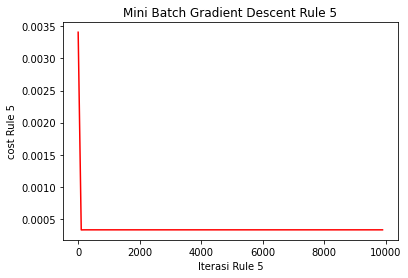

In [ ]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Mini Batch Gradient Descent Rule 5")
plt.plot(mb_iterasi_rule5_list,mb_cost_rule5_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule5

0.0003278442194820019

In [ ]:
mb_b0_rule5

1.0117165333294225

In [ ]:
mb_bpoly_rule5 #hasil untuk x1 dan x2

array([ 0.01495171, -0.01144652, -0.08497986])

In [ ]:
data_rule_5

,VA,CA,RS,quality
16,0.29,0.52,1.60,5
18,0.31,0.37,1.40,5
24,0.42,0.57,3.40,5
31,0.32,0.57,2.00,5
35,0.41,0.64,2.20,5
36,0.41,0.64,2.20,5
39,0.43,0.70,1.90,5
40,0.50,0.47,2.00,5
68,0.42,0.49,4.60,5
80,0.38,0.49,2.70,5


In [ ]:
X5=np.array(data_rule_5.iloc[::,:-1])
X5

array([[0.29, 0.52, 1.6 ],
       [0.31, 0.37, 1.4 ],
       [0.42, 0.57, 3.4 ],
       [0.32, 0.57, 2.  ],
       [0.41, 0.64, 2.2 ],
       [0.41, 0.64, 2.2 ],
       [0.43, 0.7 , 1.9 ],
       [0.5 , 0.47, 2.  ],
       [0.42, 0.49, 4.6 ],
       [0.38, 0.49, 2.7 ],
       [0.38, 0.49, 2.7 ],
       [0.24, 0.49, 2.4 ],
       [0.5 , 0.49, 2.2 ],
       [0.5 , 0.49, 2.2 ],
       [0.49, 0.49, 2.2 ],
       [0.45, 0.49, 2.6 ],
       [0.49, 0.58, 3.5 ],
       [0.24, 0.54, 2.5 ],
       [0.38, 0.55, 2.7 ],
       [0.39, 0.38, 1.5 ],
       [0.46, 0.5 , 2.7 ],
       [0.37, 0.41, 2.3 ],
       [0.28, 0.54, 2.7 ],
       [0.54, 0.45, 2.3 ],
       [0.54, 0.45, 2.3 ],
       [0.54, 0.45, 2.3 ],
       [0.47, 0.47, 2.4 ],
       [0.43, 0.39, 2.2 ],
       [0.4 , 0.52, 2.  ],
       [0.38, 0.48, 1.8 ],
       [0.38, 0.48, 2.6 ],
       [0.43, 0.36, 2.3 ],
       [0.43, 0.36, 2.3 ],
       [0.33, 0.4 , 2.6 ],
       [0.31, 0.36, 2.6 ],
       [0.21, 0.52, 1.9 ],
       [0.34, 0.44, 1.7 ],
 

In [ ]:
Y5=np.array(data_rule_5.iloc[:,3])
Y5

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X5_poly = poly_reg.fit_transform(X5)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X5_poly, Y5) 
# Proses Training Model
poly_reg.fit(X5, Y5) 

# Memprediksi hasil dengan regresi polynomial
y5_pred=lin_reg_2.predict(poly_reg.fit_transform(X5))
y5_pred

data_rule_5['pred'] = y5_pred
data_rule_5

,VA,CA,RS,quality,pred
16,0.29,0.52,1.60,5,5.004602
18,0.31,0.37,1.40,5,5.041420
24,0.42,0.57,3.40,5,4.960520
31,0.32,0.57,2.00,5,4.976566
35,0.41,0.64,2.20,5,4.994756
36,0.41,0.64,2.20,5,4.994756
39,0.43,0.70,1.90,5,5.051034
40,0.50,0.47,2.00,5,4.984772
68,0.42,0.49,4.60,5,4.990952
80,0.38,0.49,2.70,5,4.933466


##Rule 6

In [ ]:
rule_6 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka Y Good"]
index=rule_6.index
data_rule_6=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule6=pd.read_csv('rule6.csv',sep=',')
df_rule6

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.39,0.31,2.30,5,Cepat,Tinggi,Banyak,Good,0.745283,0.405405,0.857143,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
1,0.43,0.21,1.60,5,Cepat,Tinggi,Banyak,Good,0.707547,0.270270,0.948052,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
2,0.49,0.11,2.30,5,Cepat,Tinggi,Banyak,Good,0.650943,0.135135,0.857143,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
3,0.39,0.16,1.40,5,Cepat,Tinggi,Banyak,Good,0.745283,0.202703,0.974026,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
4,0.41,0.24,1.80,5,Cepat,Tinggi,Banyak,Good,0.726415,0.310811,0.922078,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
5,0.43,0.21,1.60,5,Cepat,Tinggi,Banyak,Good,0.707547,0.270270,0.948052,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
6,0.32,0.25,1.80,5,Cepat,Tinggi,Banyak,Good,0.811321,0.324324,0.922078,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
7,0.52,0.15,2.10,4,Cepat,Tinggi,Banyak,Good,0.622642,0.189189,0.883117,0.8,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
8,0.40,0.23,1.60,5,Cepat,Tinggi,Banyak,Good,0.735849,0.297297,0.948052,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...
9,0.52,0.11,1.50,5,Cepat,Tinggi,Banyak,Good,0.622642,0.135135,0.961039,0.6,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak maka...


In [ ]:
#df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
#df_rule6

In [ ]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('quality',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['quality'].values.reshape(rule_6.shape[0],1))

scaled_X6

array([[0.31818182, 0.90909091, 0.36      ],
       [0.5       , 0.60606061, 0.08      ],
       [0.77272727, 0.3030303 , 0.36      ],
       [0.31818182, 0.45454545, 0.        ],
       [0.40909091, 0.6969697 , 0.16      ],
       [0.5       , 0.60606061, 0.08      ],
       [0.        , 0.72727273, 0.16      ],
       [0.90909091, 0.42424242, 0.28      ],
       [0.36363636, 0.66666667, 0.08      ],
       [0.90909091, 0.3030303 , 0.04      ],
       [0.59090909, 0.57575758, 0.08      ],
       [0.81818182, 0.6969697 , 0.36      ],
       [0.45454545, 0.90909091, 0.08      ],
       [0.36363636, 0.6969697 , 0.44      ],
       [0.63636364, 0.90909091, 0.34      ],
       [0.77272727, 0.54545455, 0.64      ],
       [0.63636364, 0.3030303 , 0.48      ],
       [0.59090909, 1.        , 0.52      ],
       [1.        , 0.36363636, 0.44      ],
       [0.45454545, 0.93939394, 0.52      ],
       [0.13636364, 0.6969697 , 0.24      ],
       [0.09090909, 0.6969697 , 0.24      ],
       [1.

In [ ]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [ ]:
def mini_batch_gradient_descent_rule6(X6, y6, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule6 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X6_smntr = X6[random_indices]
        y6_smntr = y6[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule6 = X6_smntr[j:j+batch_size]
            yj_rule6 = y6_smntr[j:j+batch_size]
            
            y6_pred = np.dot(bpoly_rule6, Xj_rule6.T) + b0_rule6          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule6_grad = -(2/len(Xj_rule6))*(Xj_rule6.T.dot(yj_rule6-y6_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule6_grad = -(2/len(Xj_rule6))*np.sum(yj_rule6-y6_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad        # Memperbaharui bpoly(bobot) setiap iterasi 
            b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule6 in range(jumlah_variabel_rule6):
                bp_rule6=bpoly_rule6[jv_rule6]
                bp.append(bp_rule6)
            b_rule6=[b0_rule6]+bp
        
            cost_rule6 = np.mean(np.square(yj_rule6-y6_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [ ]:
import time
mulai_rule6 = time.time()
mb_bpoly_rule6, mb_b0_rule6, mb_cost_rule6, mb_b_rule6_list, mb_cost_rule6_list, mb_iterasi_rule6_list=mini_batch_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                        scaled_y6_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.5)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

Waktu Komputasi Rule 6:  5.627182245254517


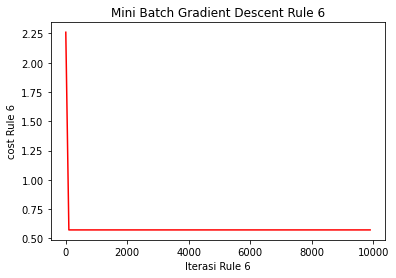

In [ ]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Mini Batch Gradient Descent Rule 6")
plt.plot(mb_iterasi_rule6_list,mb_cost_rule6_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule6

0.5716328378951615

In [ ]:
mb_b0_rule6

1.224640378719466

In [ ]:
mb_bpoly_rule6 #hasil untuk x1 dan x2

array([-0.02316439,  0.55994596, -0.57847251])

In [ ]:
data_rule_6

,VA,CA,RS,quality
3,0.39,0.31,2.30,5
4,0.43,0.21,1.60,5
5,0.49,0.11,2.30,5
7,0.39,0.16,1.40,5
8,0.41,0.24,1.80,5
9,0.43,0.21,1.60,5
10,0.32,0.25,1.80,5
15,0.52,0.15,2.10,4
17,0.40,0.23,1.60,5
29,0.52,0.11,1.50,5


In [ ]:
X6=np.array(data_rule_6.iloc[::,:-1])
X6

array([[0.39, 0.31, 2.3 ],
       [0.43, 0.21, 1.6 ],
       [0.49, 0.11, 2.3 ],
       [0.39, 0.16, 1.4 ],
       [0.41, 0.24, 1.8 ],
       [0.43, 0.21, 1.6 ],
       [0.32, 0.25, 1.8 ],
       [0.52, 0.15, 2.1 ],
       [0.4 , 0.23, 1.6 ],
       [0.52, 0.11, 1.5 ],
       [0.45, 0.2 , 1.6 ],
       [0.5 , 0.24, 2.3 ],
       [0.42, 0.31, 1.6 ],
       [0.4 , 0.24, 2.5 ],
       [0.46, 0.31, 2.25],
       [0.49, 0.19, 3.  ],
       [0.46, 0.11, 2.6 ],
       [0.45, 0.34, 2.7 ],
       [0.54, 0.13, 2.5 ],
       [0.42, 0.32, 2.7 ],
       [0.35, 0.24, 2.  ],
       [0.34, 0.24, 2.  ],
       [0.54, 0.27, 2.6 ],
       [0.47, 0.27, 2.3 ],
       [0.47, 0.27, 2.3 ],
       [0.46, 0.17, 1.6 ],
       [0.41, 0.3 , 2.1 ],
       [0.41, 0.3 , 2.1 ],
       [0.36, 0.3 , 1.6 ],
       [0.39, 0.12, 1.7 ],
       [0.39, 0.12, 1.7 ],
       [0.34, 0.28, 2.  ],
       [0.34, 0.28, 2.  ],
       [0.43, 0.17, 1.8 ],
       [0.43, 0.17, 1.8 ],
       [0.32, 0.23, 2.3 ],
       [0.54, 0.26, 2.  ],
 

In [ ]:
Y6=np.array(data_rule_6.iloc[:,3])
Y6

array([5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 5, 5, 5])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X6_poly = poly_reg.fit_transform(X6)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X6_poly, Y6) 
# Proses Training Model
poly_reg.fit(X6, Y6) 

# Memprediksi hasil dengan regresi polynomial
y6_pred=lin_reg_2.predict(poly_reg.fit_transform(X6))
y6_pred

data_rule_6['pred'] = y6_pred
data_rule_6

,VA,CA,RS,quality,pred
3,0.39,0.31,2.30,5,4.986407
4,0.43,0.21,1.60,5,4.937681
5,0.49,0.11,2.30,5,4.851196
7,0.39,0.16,1.40,5,5.007570
8,0.41,0.24,1.80,5,4.945808
9,0.43,0.21,1.60,5,4.937681
10,0.32,0.25,1.80,5,4.909884
15,0.52,0.15,2.10,4,4.795859
17,0.40,0.23,1.60,5,4.944248
29,0.52,0.11,1.50,5,4.872450


##Rule 7

In [ ]:
rule_7 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Rendah dan X3 Banyak maka Y Good"]
index=rule_7.index
data_rule_7=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule7=pd.read_csv('rule7.csv',sep=',')
df_rule7

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.610,0.49,2.1,3,Lambat,Rendah,Banyak,Good,0.462264,0.648649,0.883117,1.0,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
1,0.645,0.49,4.2,5,Lambat,Rendah,Banyak,Good,0.495283,0.648649,0.610390,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
2,0.645,0.49,4.2,5,Lambat,Rendah,Banyak,Good,0.495283,0.648649,0.610390,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
3,0.645,0.49,4.2,5,Lambat,Rendah,Banyak,Good,0.495283,0.648649,0.610390,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
4,0.600,0.49,2.8,5,Lambat,Rendah,Banyak,Good,0.452830,0.648649,0.792208,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
5,0.600,0.49,2.8,5,Lambat,Rendah,Banyak,Good,0.452830,0.648649,0.792208,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
6,0.590,0.49,2.1,4,Lambat,Rendah,Banyak,Good,0.443396,0.648649,0.883117,0.8,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
7,0.600,0.50,2.3,5,Lambat,Rendah,Banyak,Good,0.452830,0.662162,0.857143,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
8,0.600,0.50,2.3,5,Lambat,Rendah,Banyak,Good,0.452830,0.662162,0.857143,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
9,0.590,0.44,2.3,5,Lambat,Rendah,Banyak,Good,0.443396,0.581081,0.857143,0.6,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...


In [ ]:
#df_rule7=df_rule7.drop(columns=['Unnamed: 0'])
#df_rule7

In [ ]:
from sklearn import preprocessing
sx7 = preprocessing.MinMaxScaler()
sy7 = preprocessing.MinMaxScaler()

scaled_X7 = sx7.fit_transform(data_rule_7.drop('quality',axis='columns'))
scaled_y7 = sy7.fit_transform(data_rule_7['quality'].values.reshape(rule_7.shape[0],1))

scaled_X7

array([[0.12631579, 0.26086957, 0.25      ],
       [0.2       , 0.26086957, 1.        ],
       [0.2       , 0.26086957, 1.        ],
       [0.2       , 0.26086957, 1.        ],
       [0.10526316, 0.26086957, 0.5       ],
       [0.10526316, 0.26086957, 0.5       ],
       [0.08421053, 0.26086957, 0.25      ],
       [0.10526316, 0.30434783, 0.32142857],
       [0.10526316, 0.30434783, 0.32142857],
       [0.08421053, 0.04347826, 0.32142857],
       [0.08421053, 0.04347826, 0.32142857],
       [0.37894737, 0.        , 0.32142857],
       [1.        , 0.        , 0.5       ],
       [0.        , 1.        , 0.32142857],
       [0.16842105, 0.30434783, 0.        ],
       [0.48421053, 0.34782609, 0.10714286],
       [0.48421053, 0.34782609, 0.10714286]])

In [ ]:
scaled_y7_reshape=scaled_y7.reshape(scaled_y7.shape[0],)
scaled_y7_reshape

array([0. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0.5, 1. , 1. ])

In [ ]:
def mini_batch_gradient_descent_rule7(X7, y7, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule7 = X7.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule7 = np.ones(shape=(jumlah_variabel_rule7))       # b1, b2, ... b(jumlah variabel)
    b0_rule7 = 0                                         # b0 atau bias
    n = X7.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule7_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule7_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule7_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule7 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X7_smntr = X7[random_indices]
        y7_smntr = y7[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule7 = X7_smntr[j:j+batch_size]
            yj_rule7 = y7_smntr[j:j+batch_size]
            
            y7_pred = np.dot(bpoly_rule7, Xj_rule7.T) + b0_rule7          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule7_grad = -(2/len(Xj_rule7))*(Xj_rule7.T.dot(yj_rule7-y7_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule7_grad = -(2/len(Xj_rule7))*np.sum(yj_rule7-y7_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule7 = bpoly_rule7 - learning_rate * bpoly_rule7_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule7 = b0_rule7 - learning_rate * b0_rule7_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule7 in range(jumlah_variabel_rule7):
                bp_rule7=bpoly_rule7[jv_rule7]
                bp.append(bp_rule7)
            b_rule7=[b0_rule7]+bp
        
            cost_rule7 = np.mean(np.square(yj_rule7-y7_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule7_list.append(cost_rule7)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule7_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule7_list.append(b_rule7)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule7, b0_rule7, cost_rule7, b_rule7_list, cost_rule7_list, iterasi_rule7_list  # Output

In [ ]:
import time
mulai_rule7 = time.time()
mb_bpoly_rule7, mb_b0_rule7, mb_cost_rule7, mb_b_rule7_list, mb_cost_rule7_list, mb_iterasi_rule7_list=mini_batch_gradient_descent_rule7 (scaled_X7, 
                                                                                                                                        scaled_y7_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule7 = time.time()
waktu_komputasi_rule7 = (selesai_rule7 - mulai_rule7)
print("Waktu Komputasi Rule 7: ",waktu_komputasi_rule7)

Waktu Komputasi Rule 7:  4.043823719024658


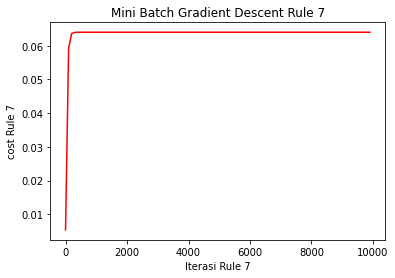

In [ ]:
plt.xlabel("Iterasi Rule 7")
plt.ylabel("cost Rule 7")
plt.title("Mini Batch Gradient Descent Rule 7")
plt.plot(mb_iterasi_rule7_list,mb_cost_rule7_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule7

0.06398425857254111

In [ ]:
mb_b0_rule7

0.4950416518830753

In [ ]:
mb_bpoly_rule7

array([0.41297442, 0.25625807, 0.39491618])

In [ ]:
data_rule_7

,VA,CA,RS,quality
74,0.610,0.49,2.1,3
102,0.645,0.49,4.2,5
103,0.645,0.49,4.2,5
105,0.645,0.49,4.2,5
108,0.600,0.49,2.8,5
110,0.600,0.49,2.8,5
118,0.590,0.49,2.1,4
149,0.600,0.50,2.3,5
150,0.600,0.50,2.3,5
165,0.590,0.44,2.3,5


In [ ]:
X7=np.array(data_rule_7.iloc[::,:-1])
X7

array([[0.61 , 0.49 , 2.1  ],
       [0.645, 0.49 , 4.2  ],
       [0.645, 0.49 , 4.2  ],
       [0.645, 0.49 , 4.2  ],
       [0.6  , 0.49 , 2.8  ],
       [0.6  , 0.49 , 2.8  ],
       [0.59 , 0.49 , 2.1  ],
       [0.6  , 0.5  , 2.3  ],
       [0.6  , 0.5  , 2.3  ],
       [0.59 , 0.44 , 2.3  ],
       [0.59 , 0.44 , 2.3  ],
       [0.73 , 0.43 , 2.3  ],
       [1.025, 0.43 , 2.8  ],
       [0.55 , 0.66 , 2.3  ],
       [0.63 , 0.5  , 1.4  ],
       [0.78 , 0.51 , 1.7  ],
       [0.78 , 0.51 , 1.7  ]])

In [ ]:
Y7=np.array(data_rule_7.iloc[:,3])
Y7

array([3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X7_poly = poly_reg.fit_transform(X7)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X7_poly, Y7) 
# Proses Training Model
poly_reg.fit(X7, Y7) 

# Memprediksi hasil dengan regresi polynomial
y7_pred=lin_reg_2.predict(poly_reg.fit_transform(X7))
y7_pred

data_rule_7['pred'] = y7_pred
data_rule_7

,VA,CA,RS,quality,pred
74,0.610,0.49,2.1,3,4.081645
102,0.645,0.49,4.2,5,4.987026
103,0.645,0.49,4.2,5,4.987026
105,0.645,0.49,4.2,5,4.987026
108,0.600,0.49,2.8,5,5.228855
110,0.600,0.49,2.8,5,5.228855
118,0.590,0.49,2.1,4,3.827090
149,0.600,0.50,2.3,5,4.421393
150,0.600,0.50,2.3,5,4.421393
165,0.590,0.44,2.3,5,4.955638


##Rule 8

In [ ]:
rule_8 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Rendah dan X3 Banyak maka Y Bad"]
index=rule_8.index
data_rule_8=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule8=pd.read_csv('rule8.csv',sep=',')
df_rule8

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.67,0.55,2.3,6,Lambat,Rendah,Banyak,Bad,0.518868,0.729730,0.857143,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
1,0.60,0.49,4.3,6,Lambat,Rendah,Banyak,Bad,0.452830,0.648649,0.597403,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
2,0.58,0.58,1.9,6,Lambat,Rendah,Banyak,Bad,0.433962,0.770270,0.909091,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
3,0.59,0.45,2.3,6,Lambat,Rendah,Banyak,Bad,0.443396,0.594595,0.857143,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
4,1.02,0.43,2.9,6,Lambat,Rendah,Banyak,Bad,0.849057,0.567568,0.779221,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
5,1.01,0.66,2.0,6,Lambat,Rendah,Banyak,Bad,0.839623,0.878378,0.896104,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
6,0.76,0.68,1.7,6,Lambat,Rendah,Banyak,Bad,0.603774,0.905405,0.935065,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...
7,0.58,0.56,3.1,6,Lambat,Rendah,Banyak,Bad,0.433962,0.743243,0.753247,0.4,Jika X1 Lambat dan X2 Rendah dan X3 Banyak mak...


In [ ]:
#df_rule8=df_rule8.drop(columns=['Unnamed: 0'])
#df_rule8

In [ ]:
from sklearn import preprocessing
sx8 = preprocessing.MinMaxScaler()
sy8 = preprocessing.MinMaxScaler()

scaled_X8 = sx8.fit_transform(data_rule_8.drop('quality',axis='columns'))
scaled_y8 = sy8.fit_transform(data_rule_8['quality'].values.reshape(rule_8.shape[0],1))

scaled_X8

array([[0.20454545, 0.48      , 0.23076923],
       [0.04545455, 0.24      , 1.        ],
       [0.        , 0.6       , 0.07692308],
       [0.02272727, 0.08      , 0.23076923],
       [1.        , 0.        , 0.46153846],
       [0.97727273, 0.92      , 0.11538462],
       [0.40909091, 1.        , 0.        ],
       [0.        , 0.52      , 0.53846154]])

In [ ]:
scaled_y8_reshape=scaled_y8.reshape(scaled_y8.shape[0],)
scaled_y8_reshape

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule8(X8, y8, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule8 = X8.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule8 = np.ones(shape=(jumlah_variabel_rule8))       # b1, b2, ... b(jumlah variabel)
    b0_rule8 = 0                                         # b0 atau bias
    n = X8.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule8_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule8_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule8_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule8 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X8_smntr = X8[random_indices]
        y8_smntr = y8[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule8 = X8_smntr[j:j+batch_size]
            yj_rule8 = y8_smntr[j:j+batch_size]
            
            y8_pred = np.dot(bpoly_rule8, Xj_rule8.T) + b0_rule8          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule8_grad = -(2/len(Xj_rule8))*(Xj_rule8.T.dot(yj_rule8-y8_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule8_grad = -(2/len(Xj_rule8))*np.sum(yj_rule8-y8_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule8 = bpoly_rule8 - learning_rate * bpoly_rule8_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule8 = b0_rule8 - learning_rate * b0_rule8_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule8 in range(jumlah_variabel_rule8):
                bp_rule8=bpoly_rule8[jv_rule8]
                bp.append(bp_rule8)
            b_rule8=[b0_rule8]+bp
        
            cost_rule8 = np.mean(np.square(yj_rule8-y8_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule8_list.append(cost_rule8)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule8_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule8_list.append(b_rule8)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule8, b0_rule8, cost_rule8, b_rule8_list, cost_rule8_list, iterasi_rule8_list  # Output

In [ ]:
import time
mulai_rule8 = time.time()
mb_bpoly_rule8, mb_b0_rule8, mb_cost_rule8, mb_b_rule8_list, mb_cost_rule8_list, mb_iterasi_rule8_list=mini_batch_gradient_descent_rule8 (scaled_X8, 
                                                                                                                                        scaled_y8_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 8, 
                                                                                                                                        learning_rate = 0.01)
selesai_rule8 = time.time()
waktu_komputasi_rule8 = (selesai_rule8 - mulai_rule8)
print("Waktu Komputasi Rule 8: ",waktu_komputasi_rule8)

Waktu Komputasi Rule 8:  2.6617441177368164


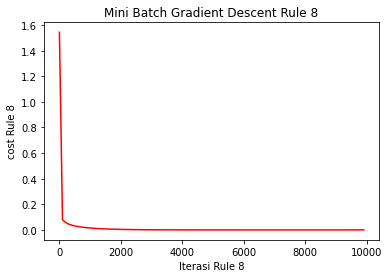

In [ ]:
plt.xlabel("Iterasi Rule 8")
plt.ylabel("cost Rule 8")
plt.title("Mini Batch Gradient Descent Rule 8")
plt.plot(mb_iterasi_rule8_list,mb_cost_rule8_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule8

1.309817903224627e-07

In [ ]:
mb_b0_rule8

-0.0010565546978735484

In [ ]:
mb_bpoly_rule8

array([0.00020754, 0.00107838, 0.00131373])

In [ ]:
data_rule_8

,VA,CA,RS,quality
65,0.67,0.55,2.3,6
73,0.60,0.49,4.3,6
134,0.58,0.58,1.9,6
136,0.59,0.45,2.3,6
202,1.02,0.43,2.9,6
252,1.01,0.66,2.0,6
523,0.76,0.68,1.7,6
558,0.58,0.56,3.1,6


In [ ]:
X8=np.array(data_rule_8.iloc[::,:-1])
X8

array([[0.67, 0.55, 2.3 ],
       [0.6 , 0.49, 4.3 ],
       [0.58, 0.58, 1.9 ],
       [0.59, 0.45, 2.3 ],
       [1.02, 0.43, 2.9 ],
       [1.01, 0.66, 2.  ],
       [0.76, 0.68, 1.7 ],
       [0.58, 0.56, 3.1 ]])

In [ ]:
Y8=np.array(data_rule_8.iloc[:,3])
Y8

array([6, 6, 6, 6, 6, 6, 6, 6])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X8_poly = poly_reg.fit_transform(X8)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X8_poly, Y8) 
# Proses Training Model
poly_reg.fit(X8, Y8) 

# Memprediksi hasil dengan regresi polynomial
y8_pred=lin_reg_2.predict(poly_reg.fit_transform(X8))
y8_pred

data_rule_8['pred'] = y8_pred
data_rule_8

,VA,CA,RS,quality,pred
65,0.67,0.55,2.3,6,6.0
73,0.60,0.49,4.3,6,6.0
134,0.58,0.58,1.9,6,6.0
136,0.59,0.45,2.3,6,6.0
202,1.02,0.43,2.9,6,6.0
252,1.01,0.66,2.0,6,6.0
523,0.76,0.68,1.7,6,6.0
558,0.58,0.56,3.1,6,6.0


##Rule 9

In [ ]:
rule_9 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Rendah dan X3 Sedikit maka Y Bad"]
index=rule_9.index
data_rule_9=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule9=pd.read_csv('rule9.csv',sep=',')
df_rule9

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.44,0.73,6.55,7,Cepat,Rendah,Sedikit,Bad,0.698113,0.972973,0.694805,0.2,Jika X1 Cepat dan X2 Rendah dan X3 Sedikit mak...
1,0.44,0.73,6.55,7,Cepat,Rendah,Sedikit,Bad,0.698113,0.972973,0.694805,0.2,Jika X1 Cepat dan X2 Rendah dan X3 Sedikit mak...
2,0.35,0.49,5.80,7,Cepat,Rendah,Sedikit,Bad,0.783019,0.648649,0.597403,0.2,Jika X1 Cepat dan X2 Rendah dan X3 Sedikit mak...
3,0.46,0.49,6.30,6,Cepat,Rendah,Sedikit,Bad,0.679245,0.648649,0.662338,0.4,Jika X1 Cepat dan X2 Rendah dan X3 Sedikit mak...
4,0.27,0.49,5.00,7,Cepat,Rendah,Sedikit,Bad,0.858491,0.648649,0.493506,0.2,Jika X1 Cepat dan X2 Rendah dan X3 Sedikit mak...
5,0.33,0.41,5.90,7,Cepat,Rendah,Sedikit,Bad,0.801887,0.540541,0.610390,0.2,Jika X1 Cepat dan X2 Rendah dan X3 Sedikit mak...
6,0.39,0.41,8.90,7,Cepat,Rendah,Sedikit,Bad,0.745283,0.540541,1.000000,0.2,Jika X1 Cepat dan X2 Rendah dan X3 Sedikit mak...


In [ ]:
#df_rule9=df_rule9.drop(columns=['Unnamed: 0'])
#df_rule9

In [ ]:
from sklearn import preprocessing
sx9 = preprocessing.MinMaxScaler()
sy9 = preprocessing.MinMaxScaler()

scaled_X9 = sx9.fit_transform(data_rule_9.drop('quality',axis='columns'))
scaled_y9 = sy9.fit_transform(data_rule_9['quality'].values.reshape(rule_9.shape[0],1))

scaled_X9

array([[0.89473684, 1.        , 0.3974359 ],
       [0.89473684, 1.        , 0.3974359 ],
       [0.42105263, 0.25      , 0.20512821],
       [1.        , 0.25      , 0.33333333],
       [0.        , 0.25      , 0.        ],
       [0.31578947, 0.        , 0.23076923],
       [0.63157895, 0.        , 1.        ]])

In [ ]:
scaled_y9_reshape=scaled_y9.reshape(scaled_y9.shape[0],)
scaled_y9_reshape

array([1., 1., 1., 0., 1., 1., 1.])

In [ ]:
def mini_batch_gradient_descent_rule9(X9, y9, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule9 = X9.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule9 = np.ones(shape=(jumlah_variabel_rule9))       # b1, b2, ... b(jumlah variabel)
    b0_rule9 = 0                                         # b0 atau bias
    n = X9.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule9_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule9_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule9_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule9 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X9_smntr = X9[random_indices]
        y9_smntr = y9[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule9 = X9_smntr[j:j+batch_size]
            yj_rule9 = y9_smntr[j:j+batch_size]
            
            y9_pred = np.dot(bpoly_rule9, Xj_rule9.T) + b0_rule9          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule9_grad = -(2/len(Xj_rule9))*(Xj_rule9.T.dot(yj_rule9-y9_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule9_grad = -(2/len(Xj_rule9))*np.sum(yj_rule9-y9_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule9 = bpoly_rule9 - learning_rate * bpoly_rule9_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule9 = b0_rule9 - learning_rate * b0_rule9_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule9 in range(jumlah_variabel_rule9):
                bp_rule9=bpoly_rule9[jv_rule9]
                bp.append(bp_rule9)
            b_rule9=[b0_rule9]+bp
        
            cost_rule9 = np.mean(np.square(yj_rule9-y9_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule9_list.append(cost_rule9)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule9_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule9_list.append(b_rule9)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule9, b0_rule9, cost_rule9, b_rule9_list, cost_rule9_list, iterasi_rule9_list  # Output

In [ ]:
import time
mulai_rule9 = time.time()
mb_bpoly_rule9, mb_b0_rule9, mb_cost_rule9, mb_b_rule9_list, mb_cost_rule9_list, mb_iterasi_rule9_list=mini_batch_gradient_descent_rule9 (scaled_X9, 
                                                                                                                                        scaled_y9_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule9 = time.time()
waktu_komputasi_rule9 = (selesai_rule9 - mulai_rule9)
print("Waktu Komputasi Rule 9: ",waktu_komputasi_rule9)

Waktu Komputasi Rule 9:  3.195355176925659


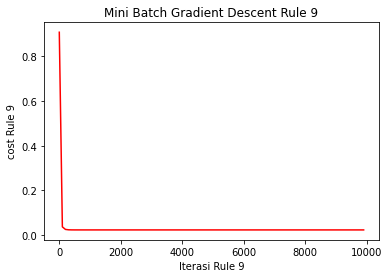

In [ ]:
plt.xlabel("Iterasi Rule 9")
plt.ylabel("cost Rule 9")
plt.title("Mini Batch Gradient Descent Rule 9")
plt.plot(mb_iterasi_rule9_list,mb_cost_rule9_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule9

0.022662668113127633

In [ ]:
mb_b0_rule9

0.9641721594453471

In [ ]:
mb_bpoly_rule9

array([-1.39501047,  0.88319473,  0.92661028])

In [ ]:
data_rule_9

,VA,CA,RS,quality
59,0.44,0.73,6.55,7
60,0.44,0.73,6.55,7
87,0.35,0.49,5.80,7
90,0.46,0.49,6.30,6
314,0.27,0.49,5.00,7
345,0.33,0.41,5.90,7
377,0.39,0.41,8.90,7


In [ ]:
X9=np.array(data_rule_9.iloc[::,:-1])
X9

array([[0.44, 0.73, 6.55],
       [0.44, 0.73, 6.55],
       [0.35, 0.49, 5.8 ],
       [0.46, 0.49, 6.3 ],
       [0.27, 0.49, 5.  ],
       [0.33, 0.41, 5.9 ],
       [0.39, 0.41, 8.9 ]])

In [ ]:
Y9=np.array(data_rule_9.iloc[:,3])
Y9

array([7, 7, 7, 6, 7, 7, 7])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X9_poly = poly_reg.fit_transform(X9)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X9_poly, Y9) 
# Proses Training Model
poly_reg.fit(X9, Y9) 

# Memprediksi hasil dengan regresi polynomial
y9_pred=lin_reg_2.predict(poly_reg.fit_transform(X9))
y9_pred

data_rule_9['pred'] = y9_pred
data_rule_9

,VA,CA,RS,quality,pred
59,0.44,0.73,6.55,7,7.0
60,0.44,0.73,6.55,7,7.0
87,0.35,0.49,5.80,7,7.0
90,0.46,0.49,6.30,6,6.0
314,0.27,0.49,5.00,7,7.0
345,0.33,0.41,5.90,7,7.0
377,0.39,0.41,8.90,7,7.0


##Rule 10

In [ ]:
rule_10 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit maka Y Bad"]
index=rule_10.index
data_rule_10=df_fuzz.iloc[index,:4]

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule10=pd.read_csv('rule10.csv',sep=',')
df_rule10

,VA,CA,RS,quality,VA_fuzz,CA_fuzz,RS_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_quality,Rule
0,0.590,0.06,6.0,7,Lambat,Tinggi,Sedikit,Bad,0.443396,0.067568,0.623377,0.2,Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit ma...
1,0.590,0.06,6.0,7,Lambat,Tinggi,Sedikit,Bad,0.443396,0.067568,0.623377,0.2,Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit ma...
2,0.725,0.09,5.5,6,Lambat,Tinggi,Sedikit,Bad,0.570755,0.108108,0.558442,0.4,Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit ma...
3,0.725,0.09,5.5,6,Lambat,Tinggi,Sedikit,Bad,0.570755,0.108108,0.558442,0.4,Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit ma...
4,0.785,0.19,5.2,6,Lambat,Tinggi,Sedikit,Bad,0.627358,0.243243,0.519481,0.4,Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit ma...


In [ ]:
#df_rule10=df_rule10.drop(columns=['Unnamed: 0'])
#df_rule10

In [ ]:
from sklearn import preprocessing
sx10 = preprocessing.MinMaxScaler()
sy10 = preprocessing.MinMaxScaler()

scaled_X10 = sx10.fit_transform(data_rule_10.drop('quality',axis='columns'))
scaled_y10 = sy10.fit_transform(data_rule_10['quality'].values.reshape(rule_10.shape[0],1))

scaled_X10

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.69230769, 0.23076923, 0.375     ],
       [0.69230769, 0.23076923, 0.375     ],
       [1.        , 1.        , 0.        ]])

In [ ]:
scaled_y10_reshape=scaled_y10.reshape(scaled_y10.shape[0],)
scaled_y10_reshape

array([1., 1., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule10(X10, y10, iterasi, batch_size = 10, learning_rate = 0.5):

    jumlah_variabel_rule10 = X10.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule10 = np.ones(shape=(jumlah_variabel_rule10))       # b1, b2, ... b(jumlah variabel)
    b0_rule10 = 0                                         # b0 atau bias
    n = X10.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule10_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule10_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule10_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule10 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X10_smntr = X10[random_indices]
        y10_smntr = y10[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule10 = X10_smntr[j:j+batch_size]
            yj_rule10 = y10_smntr[j:j+batch_size]
            
            y10_pred = np.dot(bpoly_rule10, Xj_rule10.T) + b0_rule10          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule10_grad = -(2/len(Xj_rule10))*(Xj_rule10.T.dot(yj_rule10-y10_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule10_grad = -(2/len(Xj_rule10))*np.sum(yj_rule10-y10_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule10 = bpoly_rule10 - learning_rate * bpoly_rule10_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule10 = b0_rule10 - learning_rate * b0_rule10_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule10 in range(jumlah_variabel_rule10):
                bp_rule10=bpoly_rule10[jv_rule10]
                bp.append(bp_rule10)
            b_rule10=[b0_rule10]+bp
        
            cost_rule10 = np.mean(np.square(yj_rule10-y10_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule10_list.append(cost_rule10)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule10_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule10_list.append(b_rule10)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule10, b0_rule10, cost_rule10, b_rule10_list, cost_rule10_list, iterasi_rule10_list  # Output

In [ ]:
import time
mulai_rule10 = time.time()
mb_bpoly_rule10, mb_b0_rule10, mb_cost_rule10, mb_b_rule10_list, mb_cost_rule10_list, mb_iterasi_rule10_list=mini_batch_gradient_descent_rule10 (scaled_X10, 
                                                                                                                                        scaled_y10_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.01)
selesai_rule10 = time.time()
waktu_komputasi_rule10 = (selesai_rule10 - mulai_rule10)
print("Waktu Komputasi Rule 10: ",waktu_komputasi_rule10)

Waktu Komputasi Rule 10:  2.6628530025482178


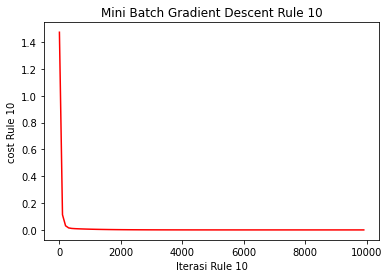

In [ ]:
plt.xlabel("Iterasi Rule 10")
plt.ylabel("cost Rule 10")
plt.title("Mini Batch Gradient Descent Rule 10")
plt.plot(mb_iterasi_rule10_list,mb_cost_rule10_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule10

2.73466185760055e-07

In [ ]:
mb_b0_rule10

-0.5723794131037226

In [ ]:
mb_bpoly_rule10

array([-0.32168049,  0.89341109,  1.57210022])

In [ ]:
data_rule_10

,VA,CA,RS,quality
290,0.590,0.06,6.0,7
291,0.590,0.06,6.0,7
411,0.725,0.09,5.5,6
413,0.725,0.09,5.5,6
600,0.785,0.19,5.2,6


In [ ]:
X10=np.array(data_rule_10.iloc[::,:-1])
X10

array([[0.59 , 0.06 , 6.   ],
       [0.59 , 0.06 , 6.   ],
       [0.725, 0.09 , 5.5  ],
       [0.725, 0.09 , 5.5  ],
       [0.785, 0.19 , 5.2  ]])

In [ ]:
Y10=np.array(data_rule_10.iloc[:,3])
Y10

array([7, 7, 6, 6, 6])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X10_poly = poly_reg.fit_transform(X10)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X10_poly, Y10) 
# Proses Training Model
poly_reg.fit(X10, Y10) 

# Memprediksi hasil dengan regresi polynomial
y10_pred=lin_reg_2.predict(poly_reg.fit_transform(X10))
y10_pred

data_rule_10['pred'] = y10_pred
data_rule_10

,VA,CA,RS,quality,pred
290,0.590,0.06,6.0,7,7.0
291,0.590,0.06,6.0,7,7.0
411,0.725,0.09,5.5,6,6.0
413,0.725,0.09,5.5,6,6.0
600,0.785,0.19,5.2,6,6.0
